# Day 28

## Project 2 - FIFA Dataset Analysis (Web Scraping)

## Web Scraping
- Library : BeautifulSoup

### Importing Librabies

In [1]:
# Numpy 
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# BeautifulSoup
from bs4 import BeautifulSoup

# Request
import requests

# RegEx
import re

In [ ]:
# Url of web scraping
url = "https://en.wikipedia.org/wiki/List_of_Academy_Award-winning_films"

req = requests.get(url)
req

<Response [200]>

In [ ]:
soup = BeautifulSoup(req.content)
soup.prettify()

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   List of Academy Award-winning films - Wikipedia\n  </title>\n  <script>\n   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"ac6919cf-3a1e-4ed7-8062-abaf7c956862","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_Academy_Award-winning_films","wgTitle":"List of Academy Award-winning films","wgCurRevisionId":1129502305,"wgRevisionId":1129502305,"wgArticleId":3578923,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is diffe

In [ ]:
Film = []
Year = []
Award = []
Nomination = []
count= 0

for i in soup.findAll('td'):
  i = re.sub('^<td>.*">|<td>|</td>|<.*>|\n',"",str(i))
  if count == 0:
    Film.append (i)
    count += 1
  elif count == 1:
    Year.append(i)
    count += 1
  elif count == 2 :
    Award.append(i)
    count += 1
  else:
    count = 0
    Nomination.append(i)

In [ ]:
Film

['CODA',
 'Dune',
 ' The Eyes of Tammy Faye',
 'No Time to Die',
 'The Windshield Wiper',
 ' The Long Goodbye',
 'The Queen of Basketball',
 'Summer of Soul',
 ' Drive My Car',
 'Encanto',
 ' West Side Story',
 ' Belfast',
 ' The Power of the Dog',
 ' King Richard',
 'Cruella',
 'Nomadland',
 'The Father',
 'Judas and the Black Messiah',
 'Minari',
 'Mank',
 'Sound of Metal',
 "Ma Rainey's Black Bottom",
 'Promising Young Woman',
 'Tenet',
 'Soul',
 'Another Round',
 'My Octopus Teacher',
 'Colette',
 'If Anything Happens I Love You',
 'Two Distant Strangers',
 'Parasite',
 'Ford v Ferrari',
 "Learning to Skateboard in a Warzone (If You're a Girl)",
 "The Neighbors' Window",
 'Little Women',
 'Marriage Story',
 'Jojo Rabbit',
 'Toy Story 4',
 'Joker',
 'Once Upon a Time in Hollywood',
 '1917',
 'Judy',
 'Bombshell',
 'Rocketman',
 'American Factory',
 'Hair Love',
 'Green Book',
 'Bohemian Rhapsody',
 'Roma',
 'Black Panther',
 'The Favourite',
 'A Star Is Born',
 'Vice',
 'BlacKkKlans

In [ ]:
print(len(Film))
print(Film[1346])

1350
Zorba the Greek


In [ ]:
print(len(Year), '\n', Year[1346])

1350 
 1964


In [ ]:
print(len(Award), '\n', Award[1346])

1349 
 3


In [ ]:
print(len(Nomination), '\n', Nomination[1346])

1349 
 7


In [ ]:
Film[-4]

'Zorba the Greek'

In [ ]:
# Create a DataFrame
oscar = pd.DataFrame({'Film': Film [0:1347], 'Year': Year [0:1347], 'Award': Award [0:1347], 'Nomination': Nomination [0:1347]})
oscar.head()

,Film,Year,Award,Nomination
0,CODA,2021,3,3
1,Dune,2021,6,10
2,The Eyes of Tammy Faye,2021,2,2
3,No Time to Die,2021,1,3
4,The Windshield Wiper,2021,1,1


In [ ]:
oscar.tail(10)

,Film,Year,Award,Nomination
1337,World Without Sun,1964,1,1
1338,Wrestling Swordfish,32,1,1
1339,Written on the Wind,1956,1,3
1340,Wuthering Heights,1939,1,8
1341,Yankee Doodle Dandy,1942,3,8
1342,The Yankee Doodle Mouse,1943,1,1
1343,The Yearling,1946,2,7
1344,"Yesterday, Today and Tomorrow",1964,1,1
1345,You Can't Take It with You,1938,2,7
1346,Zorba the Greek,1964,3,7


In [ ]:
oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Film        1347 non-null   object
 1   Year        1347 non-null   object
 2   Award       1347 non-null   object
 3   Nomination  1347 non-null   object
dtypes: object(4)
memory usage: 42.2+ KB


Link: https://sofifa.com/players?offset=1,
https://sofifa.com/players?r=230009&set=true&offset=0
### Steps

1. Import all the libraries for Web Scalping, Data visualization, Data Analysis
2. Scrape the Data
3. Data Exploration, Data cleaning, Data Manuplation
4. Convert it inot a DataFrame
5. Perform the Analysis (EDA)

- Performing the __Data Scalping__ from the Web

In [ ]:
url = "https://sofifa.com/players?offset=1" 
req = requests.get(url)
req

<Response [200]>

- For Multiple pages 

In [ ]:
urls = []
for i in range (1,11) : 
  url = f"https://sofifa.com/players?offset={i}"
  urls.append(url) 
  print(url)

https://sofifa.com/players?offset=1
https://sofifa.com/players?offset=2
https://sofifa.com/players?offset=3
https://sofifa.com/players?offset=4
https://sofifa.com/players?offset=5
https://sofifa.com/players?offset=6
https://sofifa.com/players?offset=7
https://sofifa.com/players?offset=8
https://sofifa.com/players?offset=9
https://sofifa.com/players?offset=10


In [ ]:
soup = BeautifulSoup(req.content)
soup

<!DOCTYPE html>
<html lang="en-US">
<head id="head">
<title>Players FIFA 23 Jan 13, 2023 SoFIFA</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="VGaFvm9Qm-qhCd2LCDi8QKWXNPSrVE2SJ2iT8c3vI1g" name="google-site-verification"/>
<meta content="FIFA 23 player ratings on Jan 13, 2023" name="description"/>
<meta content="Khachin Borjigin" name="author"/>
<meta content="2009 - 2023 SoFIFA.com" name="copyright"/>
<meta content="light" name="twitter:widgets:theme"/>
<meta content="#e6e6e6" name="twitter:widgets:border-color"/>
<link href="/launcher-icon.png" rel="shortcut icon"/>
<link href="/launcher-icon.png" rel="apple-touch-icon"/>
<script>window.ramp = window.ramp || {};window.ramp.que = window.ramp.que || [];</script>
<link href="https://sofifa.com/players?hl=en-US" hreflang="en" rel="alternate"/>
<link href="https://sofifa.com/players?hl=fr-FR" hreflang="fr" rel="alternate"/>
<link href="https://sofifa.com/players?hl=de-DE

- Data Exploration, Data Cleaning, Data Manipulation

In [ ]:
lists = [[] for _ in range (10)]
for i in soup.findAll('tr'):
  Image_link = re.sub('<img.*data-srcset="| .*/>','', str(i.find('img',{"class":"player-check"})))
  Name = re.sub('<a.*ellipsis">|</div>.*/a>','',str(i.find(['a','aria-label'])))
  Age = re.sub('<td.*">|</td>','',str (i.find('td',{'class':"col col-ae"})))
  OVA = re.sub('<td.*">|</.*td>','',str (i.find('td',{'class':"col col-oa"})))
  POT = re.sub('<td.*">|<.*>','',str (i.find('td', {'class':"col col-pt"})))
  Team = re.sub('<a.*">|<.*>','',str (i.findAll('a')[-1]))
  Duration = re.sub('<.*\n|<.*>','',str (i.find("div",{'class':'sub'})))
  Value = re.sub('<td.*">|€|M|K|<.*>','',str (i.find('td',{"class":"col col-vl"})))
  Wage = re.sub('<td.*">|€|K|<.*>','',str (i.find("td", {"class":"col col-wg"})))
  Total_stats = re.sub('<span.*">|<.*>','',str (i.find("span", {"class":"bp3-tag p"})))


  lists[0].append(Image_link)
  lists[1].append(Name)
  lists[2].append(Age)
  lists[3].append(OVA)
  lists[4].append(POT)
  lists[5].append(Team)
  lists[6].append(Duration)
  lists[7].append(Value)
  lists[8].append(Wage)
  lists[9].append(Total_stats)


In [ ]:
print(Image_link),
print(Name)
print(Age)
print(OVA)
print(POT)
print(Team)
print(Duration)
print(Value)
print(Wage)
print(Total_stats)

https://cdn.sofifa.net/players/259/583/23_120.png
D. Udogie
19
76
89
Udinese
Jun 30, 2023 
17
34
1977


In [ ]:
fifa = pd.DataFrame({'Image_link': lists[0],'Name': lists[1], 'Age': lists[2], 'OVA' : lists[3], 'POT' : lists[4],
                     'Team': lists[5], 'Duration': lists[6], 'Value': lists[7], 'Wage': lists[8], 
                     'Total_stats': lists[9]})

In [ ]:
fifa.drop(0,inplace = True)

In [ ]:
fifa.head(10)

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
1,https://cdn.sofifa.net/players/255/565/23_120.png,K. Mitoma,25,75,78,Brighton &amp; Hove Albion,2021 ~ 2025,7.5,51,1943
2,https://cdn.sofifa.net/players/247/635/23_120.png,K. Kvaratskhelia,21,79,88,Napoli,2022 ~ 2027,39.5,46,1949
3,https://cdn.sofifa.net/players/268/438/23_120.png,Alejandro Garnacho,18,66,86,Manchester United,2021 ~ 2023,2.4,11,1656
4,https://cdn.sofifa.net/players/253/072/23_120.png,D. Núñez,23,82,89,Liverpool,2022 ~ 2028,61.5,120,2075
5,https://cdn.sofifa.net/players/229/891/23_120.png,J. Ryerson,24,74,76,FC Union Berlin,2018 ~ 2023,5,20,1897
6,https://cdn.sofifa.net/players/223/689/23_120.png,W. Weghorst,29,79,79,Beşiktaş,"May 31, 2023",17.5,59,1900
7,https://cdn.sofifa.net/players/176/580/23_120.png,L. Suárez,35,84,84,Nacional,2022 ~ 2022,18,1,2231
8,https://cdn.sofifa.net/players/263/578/23_120.png,Balde,18,74,85,FC Barcelona,2021 ~ 2024,8.5,24,1799
9,https://cdn.sofifa.net/players/252/042/23_120.png,João Pedro,20,72,85,Watford,2020 ~ 2025,5.5,25,1705
10,https://cdn.sofifa.net/players/239/837/23_120.png,A. Mac Allister,23,78,83,Brighton &amp; Hove Albion,2019 ~ 2025,21,56,2122


In [ ]:
fifa.tail(10)

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
51,https://cdn.sofifa.net/players/208/418/23_120.png,Y. Carrasco,28,84,84,Atlético Madrid,2020 ~ 2024,42.5,85,2138
52,https://cdn.sofifa.net/players/231/352/23_120.png,T. Abraham,24,82,86,Roma,2021 ~ 2026,44,77,1926
53,https://cdn.sofifa.net/players/231/936/23_120.png,B. White,24,80,86,Arsenal,2021 ~ 2026,30,69,1769
54,https://cdn.sofifa.net/players/234/378/23_120.png,D. Rice,23,84,87,West Ham United,2015 ~ 2024,52,83,2089
55,https://cdn.sofifa.net/players/244/369/23_120.png,V. Tsygankov,24,80,83,Dynamo Kyiv,2015 ~ 2023,29,1,1982
56,https://cdn.sofifa.net/players/245/367/23_120.png,X. Simons,19,75,87,PSV,2022 ~ 2027,13.5,10,1946
57,https://cdn.sofifa.net/players/247/497/23_120.png,A. Bella Kotchap,20,74,83,Southampton,2022 ~ 2026,8.5,28,1580
58,https://cdn.sofifa.net/players/251/517/23_120.png,J. Gvardiol,20,82,89,RB Leipzig,2021 ~ 2027,56,44,2044
59,https://cdn.sofifa.net/players/256/402/23_120.png,C. Alcaraz,19,72,84,Racing Club,2020 ~ 2026,5.5,8,1919
60,https://cdn.sofifa.net/players/259/583/23_120.png,D. Udogie,19,76,89,Udinese,"Jun 30, 2023",17,34,1977


In [ ]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image_link   60 non-null     object
 1   Name         60 non-null     object
 2   Age          60 non-null     object
 3   OVA          60 non-null     object
 4   POT          60 non-null     object
 5   Team         60 non-null     object
 6   Duration     60 non-null     object
 7   Value        60 non-null     object
 8   Wage         60 non-null     object
 9   Total_stats  60 non-null     object
dtypes: object(10)
memory usage: 5.2+ KB


In [ ]:
fifa['Age'] = pd.to_numeric (fifa['Age'])
fifa['OVA'] = pd.to_numeric (fifa['OVA'])
fifa['POT'] = pd.to_numeric (fifa['POT'])
fifa['Value'] = pd.to_numeric (fifa['Value'])	
fifa['Wage'] =  pd.to_numeric (fifa['Wage'])	
fifa['Total_stats'] = pd.to_numeric (fifa['Total_stats'])

In [ ]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image_link   60 non-null     object 
 1   Name         60 non-null     object 
 2   Age          60 non-null     int64  
 3   OVA          60 non-null     int64  
 4   POT          60 non-null     int64  
 5   Team         60 non-null     object 
 6   Duration     60 non-null     object 
 7   Value        60 non-null     float64
 8   Wage         60 non-null     int64  
 9   Total_stats  60 non-null     int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 5.2+ KB


# Day 29

## For Multiple pages in data set

In [ ]:
# for multiple links
fifa_final = pd.DataFrame()
for i in range (1,11) : 
  url = f"https://sofifa.com/players?offset={i}"
  # Requesting the url
  req = requests.get(url)
  # BeautifulSoup
  soup = BeautifulSoup(req.content)
  # RegEx
  lists = [[] for _ in range (10)]
  for i in soup.findAll('tr'):
    Image_link = re.sub('<img.*data-srcset="| .*/>','', str(i.find('img',{"class":"player-check"})))
    Name = re.sub('<a.*ellipsis">|</div>.*/a>','',str(i.find(['a','aria-label'])))
    Age = re.sub('<td.*">|</td>','',str (i.find('td',{'class':"col col-ae"})))
    OVA = re.sub('<td.*">|</.*td>','',str (i.find('td',{'class':"col col-oa"})))
    POT = re.sub('<td.*">|<.*>','',str (i.find('td', {'class':"col col-pt"})))
    Team = re.sub('<a.*">|<.*>','',str (i.findAll('a')[-1]))
    Duration = re.sub('<.*\n|<.*>','',str (i.find("div",{'class':'sub'})))
    Value = re.sub('<td.*">|€|M|K|<.*>','',str (i.find('td',{"class":"col col-vl"})))
    Wage = re.sub('<td.*">|€|K|<.*>','',str (i.find("td", {"class":"col col-wg"})))
    Total_stats = re.sub('<span.*">|<.*>','',str (i.find("span", {"class":"bp3-tag p"})))


    lists[0].append(Image_link)
    lists[1].append(Name)
    lists[2].append(Age)
    lists[3].append(OVA)
    lists[4].append(POT)
    lists[5].append(Team)
    lists[6].append(Duration)
    lists[7].append(Value)
    lists[8].append(Wage)
    lists[9].append(Total_stats)

    # Adding the DataFrame
  fifa = pd.DataFrame({'Image_link': lists[0],'Name': lists[1], 'Age': lists[2], 'OVA' : lists[3], 'POT' : lists[4],
                      'Team': lists[5], 'Duration': lists[6], 'Value': lists[7], 'Wage': lists[8], 
                      'Total_stats': lists[9]})
  fifa.drop (0,inplace = True)
    # Converting the columns format
  fifa['Age'] = pd.to_numeric (fifa['Age'])
  fifa['OVA'] = pd.to_numeric (fifa['OVA'])
  fifa['POT'] = pd.to_numeric (fifa['POT'])
  fifa['Value'] = pd.to_numeric (fifa['Value'])	
  fifa['Wage'] =  pd.to_numeric (fifa['Wage'])	
  fifa['Total_stats'] = pd.to_numeric (fifa['Total_stats'])

# Adding all the 10 pages into one dataframe
  fifa_final = fifa_final.append(fifa, ignore_index = True)

In [ ]:
def fifa_datset(url): 
  # for multiple links
  fifa_final = pd.DataFrame()
  for i in range (1,11) : 
    # url = f"https://sofifa.com/players?offset={i}"
    url += str(i)
    # Requesting the url
    req = requests.get(url)
    # BeautifulSoup
    soup = BeautifulSoup(req.content)
    # RegEx
    lists = [[] for _ in range (10)]
    for i in soup.findAll('tr'):
      Image_link = re.sub('<img.*data-srcset="| .*/>','', str(i.find('img',{"class":"player-check"})))
      Name = re.sub('<a.*ellipsis">|</div>.*/a>','',str(i.find(['a','aria-label'])))
      Age = re.sub('<td.*">|</td>','',str (i.find('td',{'class':"col col-ae"})))
      OVA = re.sub('<td.*">|</.*td>','',str (i.find('td',{'class':"col col-oa"})))
      POT = re.sub('<td.*">|<.*>','',str (i.find('td', {'class':"col col-pt"})))
      Team = re.sub('<a.*">|<.*>','',str (i.findAll('a')[-1]))
      Duration = re.sub('<.*\n|<.*>','',str (i.find("div",{'class':'sub'})))
      Value = re.sub('<td.*">|€|M|K|<.*>','',str (i.find('td',{"class":"col col-vl"})))
      Wage = re.sub('<td.*">|€|K|<.*>','',str (i.find("td", {"class":"col col-wg"})))
      Total_stats = re.sub('<span.*">|<.*>','',str (i.find("span", {"class":"bp3-tag p"})))


      lists[0].append(Image_link)
      lists[1].append(Name)
      lists[2].append(Age)
      lists[3].append(OVA)
      lists[4].append(POT)
      lists[5].append(Team)
      lists[6].append(Duration)
      lists[7].append(Value)
      lists[8].append(Wage)
      lists[9].append(Total_stats)

      # Adding the DataFrame
    fifa = pd.DataFrame({'Image_link': lists[0],'Name': lists[1], 'Age': lists[2], 'OVA' : lists[3], 'POT' : lists[4],
                        'Team': lists[5], 'Duration': lists[6], 'Value': lists[7], 'Wage': lists[8], 
                        'Total_stats': lists[9]})
    fifa.drop (0,inplace = True)
      # Converting the columns format
    fifa['Age'] = pd.to_numeric (fifa['Age'])
    fifa['OVA'] = pd.to_numeric (fifa['OVA'])
    fifa['POT'] = pd.to_numeric (fifa['POT'])
    fifa['Value'] = pd.to_numeric (fifa['Value'])	
    fifa['Wage'] =  pd.to_numeric (fifa['Wage'])	
    fifa['Total_stats'] = pd.to_numeric (fifa['Total_stats'])

  # Adding all the 10 pages into one dataframe
    fifa_final = fifa_final.append(fifa, ignore_index = True)

  return fifa_final

In [ ]:
fifa_datset("https://sofifa.com/players?offset=")

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,https://cdn.sofifa.net/players/255/565/23_120.png,K. Mitoma,25,75,78,Brighton &amp; Hove Albion,2021 ~ 2025,7.5,51,1943
1,https://cdn.sofifa.net/players/247/635/23_120.png,K. Kvaratskhelia,21,79,88,Napoli,2022 ~ 2027,39.5,46,1949
2,https://cdn.sofifa.net/players/268/438/23_120.png,Alejandro Garnacho,18,66,86,Manchester United,2021 ~ 2023,2.4,11,1656
3,https://cdn.sofifa.net/players/253/072/23_120.png,D. Núñez,23,82,89,Liverpool,2022 ~ 2028,61.5,120,2075
4,https://cdn.sofifa.net/players/229/891/23_120.png,J. Ryerson,24,74,76,FC Union Berlin,2018 ~ 2023,5.0,20,1897
...,...,...,...,...,...,...,...,...,...,...
595,https://cdn.sofifa.net/players/245/367/23_120.png,X. Simons,19,75,87,PSV,2022 ~ 2027,13.5,10,1946
596,https://cdn.sofifa.net/players/247/497/23_120.png,A. Bella Kotchap,20,74,83,Southampton,2022 ~ 2026,8.5,28,1580
597,https://cdn.sofifa.net/players/251/517/23_120.png,J. Gvardiol,20,82,89,RB Leipzig,2021 ~ 2027,56.0,44,2044
598,https://cdn.sofifa.net/players/256/402/23_120.png,C. Alcaraz,19,72,84,Racing Club,2020 ~ 2026,5.5,8,1919


In [ ]:
fifa_final.shape

(600, 10)

In [ ]:
fifa_600 = fifa_final
fifa_598 = fifa_datset("https://sofifa.com/players?offset=")

- If our dataset is different while using def function then do the following steps.

- For this we have to approch through the Union - Intesection 

In [ ]:
print(fifa_600.shape)
print(fifa_598.shape)

(600, 10)
(600, 10)


In [ ]:
# Removing Columns --> Image_link and Duration
fifa_600.drop(['Image_link', 'Duration'], inplace = True, axis = 1)

In [ ]:
fifa_600

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
0,K. Mitoma,25,75,78,Brighton &amp; Hove Albion,7.5,51,1943
1,K. Kvaratskhelia,21,79,88,Napoli,39.5,46,1949
2,Alejandro Garnacho,18,66,86,Manchester United,2.4,11,1656
3,D. Núñez,23,82,89,Liverpool,61.5,120,2075
4,J. Ryerson,24,74,76,FC Union Berlin,5.0,20,1897
...,...,...,...,...,...,...,...,...
595,M. van de Ven,21,75,85,VfL Wolfsburg,12.0,25,1774
596,Pedri,19,85,92,FC Barcelona,104.5,115,2112
597,J. Bellingham,19,85,91,Borussia Dortmund,81.5,44,2188
598,L. Colwill,19,70,84,Brighton &amp; Hove Albion,3.5,22,1683


### Exploratory Data Analysis

In [ ]:
fifa_600.head(20)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
0,K. Mitoma,25,75,78,Brighton &amp; Hove Albion,7.5,51,1943
1,K. Kvaratskhelia,21,79,88,Napoli,39.5,46,1949
2,Alejandro Garnacho,18,66,86,Manchester United,2.4,11,1656
3,D. Núñez,23,82,89,Liverpool,61.5,120,2075
4,J. Ryerson,24,74,76,FC Union Berlin,5.0,20,1897
5,W. Weghorst,29,79,79,Beşiktaş,17.5,59,1900
6,L. Suárez,35,84,84,Nacional,18.0,1,2231
7,Balde,18,74,85,FC Barcelona,8.5,24,1799
8,João Pedro,20,72,85,Watford,5.5,25,1705
9,A. Mac Allister,23,78,83,Brighton &amp; Hove Albion,21.0,56,2122


In [ ]:
fifa_600.tail(9)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
591,J. Gvardiol,20,82,89,RB Leipzig,56.0,44,2044
592,C. Alcaraz,19,72,84,Racing Club,5.5,8,1919
593,Gonçalo Inácio,20,79,88,Sporting CP,36.0,11,1773
594,D. Udogie,19,76,89,Udinese,17.0,34,1977
595,M. van de Ven,21,75,85,VfL Wolfsburg,12.0,25,1774
596,Pedri,19,85,92,FC Barcelona,104.5,115,2112
597,J. Bellingham,19,85,91,Borussia Dortmund,81.5,44,2188
598,L. Colwill,19,70,84,Brighton &amp; Hove Albion,3.5,22,1683
599,Fresneda,17,67,82,Real Valladolid,2.2,500,1627


In [ ]:
fifa_600.describe()

,Age,OVA,POT,Value,Wage,Total_stats
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,21.198333,76.816667,85.635000,26.442000,57.346667,1894.280000
std,3.607958,5.800788,3.741895,23.554741,86.607301,197.439321
min,17.000000,63.000000,70.000000,0.000000,0.000000,1148.000000
25%,19.000000,73.000000,85.000000,5.500000,10.000000,1768.000000
50%,20.000000,78.000000,86.000000,17.000000,30.000000,1919.000000
75%,23.000000,81.000000,88.000000,42.500000,71.000000,2044.000000
max,35.000000,89.000000,92.000000,105.500000,500.000000,2239.000000


- Find the name of the player who is having the highest wage.

In [ ]:
fifa_600[fifa_600["Wage"] == max (fifa_600["Wage"])]

# M. Mudryk is getting the highest pay.

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
28,N. Mbamba,17,64,84,Club Brugge,1.5,500,1591
87,N. Mbamba,17,64,84,Club Brugge,1.5,500,1591
146,N. Mbamba,17,64,84,Club Brugge,1.5,500,1591
205,N. Mbamba,17,64,84,Club Brugge,1.5,500,1591
264,N. Mbamba,17,64,84,Club Brugge,1.5,500,1591
323,N. Mbamba,17,64,84,Club Brugge,1.5,500,1591
359,Fresneda,17,67,82,Real Valladolid,2.2,500,1627
382,N. Mbamba,17,64,84,Club Brugge,1.5,500,1591
419,Fresneda,17,67,82,Real Valladolid,2.2,500,1627
441,N. Mbamba,17,64,84,Club Brugge,1.5,500,1591


- Duplicate Datas

In [ ]:
fifa_600.duplicated().sum(axis = 0)

531

- Droping the duplicate Datas

In [ ]:
fifa_600.drop_duplicates(inplace = True)

In [ ]:
fifa_600

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
0,K. Mitoma,25,75,78,Brighton &amp; Hove Albion,7.5,51,1943
1,K. Kvaratskhelia,21,79,88,Napoli,39.5,46,1949
2,Alejandro Garnacho,18,66,86,Manchester United,2.4,11,1656
3,D. Núñez,23,82,89,Liverpool,61.5,120,2075
4,J. Ryerson,24,74,76,FC Union Berlin,5.0,20,1897
...,...,...,...,...,...,...,...,...
359,Fresneda,17,67,82,Real Valladolid,2.2,500,1627
418,L. Colwill,19,70,84,Brighton &amp; Hove Albion,3.5,22,1683
477,Gonçalo Inácio,20,79,88,Sporting CP,36.0,11,1773
537,J. Bellingham,19,85,91,Borussia Dortmund,81.5,44,2188


In [ ]:
fifa_600[fifa_600["Wage"] == max (fifa_600["Wage"])]['Name']

28     N. Mbamba
359     Fresneda
Name: Name, dtype: object

- 2.1 Find the Youngest player.
- 2.2 Find the Oldest Player

In [ ]:
fifa_600[fifa_600["Age"] == min (fifa_600["Age"])]#["Name"], fifa_600[fifa_600["Age"] == min (fifa_600["Age"])]["Age"]

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
16,Gavi,17,80,87,FC Barcelona,39.0,18,2035
21,G. Kuol,17,63,85,,0.0,0,1494
23,A. Nusa,17,68,88,Club Brugge,3.3,2,1682
26,Y. Moukoko,17,75,89,Borussia Dortmund,13.0,8,1828
28,N. Mbamba,17,64,84,Club Brugge,1.5,500,1591
46,A. Güler,17,70,86,Fenerbahçe,4.0,4,1786
47,R. Lewis,17,65,86,Manchester City,2.2,1,1622
359,Fresneda,17,67,82,Real Valladolid,2.2,500,1627


In [ ]:
fifa_600[fifa_600["Age"] == max (fifa_600["Age"])]#["Name"]#, fifa_600[fifa_600["Age"] == max (fifa_600["Age"])]["Age"]

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
6,L. Suárez,35,84,84,Nacional,18.0,1,2231


- 3. List out the top 10 players according to their Potential.

In [ ]:
fifa_600.sort_values(by = "POT", ascending = False).head(10)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
596,Pedri,19,85,92,FC Barcelona,104.5,115,2112
537,J. Bellingham,19,85,91,Borussia Dortmund,81.5,44,2188
32,F. Wirtz,19,82,91,Bayer 04 Leverkusen,66.0,38,1994
49,Ansu Fati,19,79,90,FC Barcelona,38.0,84,1913
43,W. Saliba,21,81,89,Arsenal,54.0,62,1855
3,D. Núñez,23,82,89,Liverpool,61.5,120,2075
168,Casemiro,30,89,89,Manchester United,86.0,240,2239
109,H. Kane,28,89,89,Tottenham Hotspur,105.5,240,2199
59,D. Udogie,19,76,89,Udinese,17.0,34,1977
57,J. Gvardiol,20,82,89,RB Leipzig,56.0,44,2044


- 4.Create a New DataFrame with the values of columns Name and POT.

In [ ]:
new_fifa = fifa_600[["Name","POT"]]

- 5.Plot a grap of First 10 player name with first 10 POT

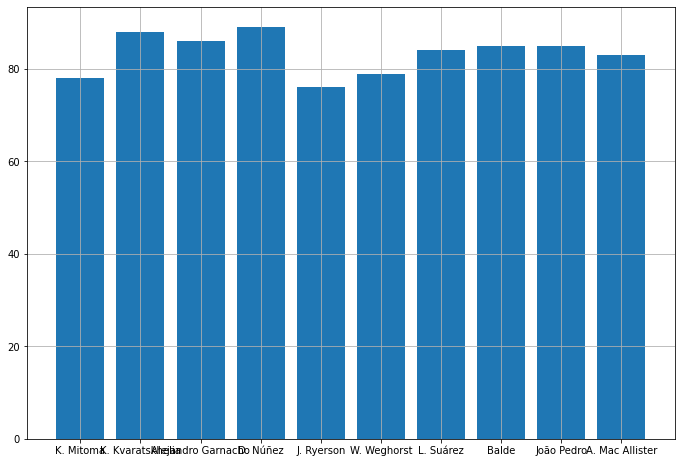

In [ ]:
x = new_fifa["Name"].head(10)
y = new_fifa["POT"].head(10)

fig = plt.figure()
pl = fig.add_axes([1.5,1.5,1.5,1.5])
plt.grid()
pl.bar(x, y);

- 6. Plot a grap - Player's Name V/s Player's Wage.

Text(0, 0.5, "Player's Wages")

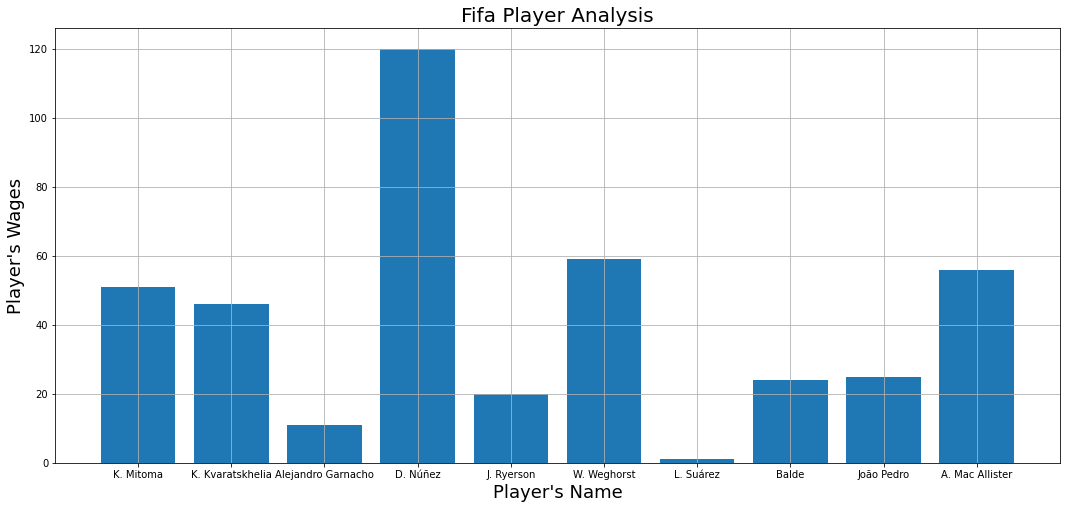

In [ ]:
x = fifa_600["Name"][:10]
y = fifa_600["Wage"][:10]


plt.figure(figsize = (18,8));
plt.bar(x,y);
plt.grid();

plt.title("Fifa Player Analysis", fontsize = 20);
plt.xlabel("Player's Name",fontsize = 18)
plt.ylabel("Player's Wages",fontsize = 18)


- 6. Find the Player who has Scored Highest Number of Golas.

- 6. FInd all the players whose potential is more than equal to 90

In [ ]:
fifa_600[fifa_600['POT'] >= 90]#['Name'] 

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
32,F. Wirtz,19,82,91,Bayer 04 Leverkusen,66.0,38,1994
49,Ansu Fati,19,79,90,FC Barcelona,38.0,84,1913
537,J. Bellingham,19,85,91,Borussia Dortmund,81.5,44,2188
596,Pedri,19,85,92,FC Barcelona,104.5,115,2112


- 7. Find all the players whose Potentiam is more than 90 and the age is less than 20.

In [ ]:
fifa_600 [ ( fifa_600 ['POT'] > 90 ) & ( fifa_600 ['Age'] < 20 ) ] ['Name']

32          F. Wirtz
537    J. Bellingham
596            Pedri
Name: Name, dtype: object

- 8. Find all the players whose values > 10 but wages < 50.

In [ ]:
fifa_600 [ ( fifa_600 ['Value'] > 10 ) & ( fifa_600 ['Wage'] < 50 ) ] ['Name']

1      K. Kvaratskhelia
6             L. Suárez
10            G. Rutter
12         E. Fernández
13           H. Elliott
16                 Gavi
22            A. Varela
24        R. Kolo Muani
26           Y. Moukoko
29        D. Szoboszlai
31          J. Frimpong
32             F. Wirtz
35            T. Almada
37        António Silva
54         V. Tsygankov
55            X. Simons
57          J. Gvardiol
59            D. Udogie
299       M. van de Ven
477      Gonçalo Inácio
537       J. Bellingham
Name: Name, dtype: object

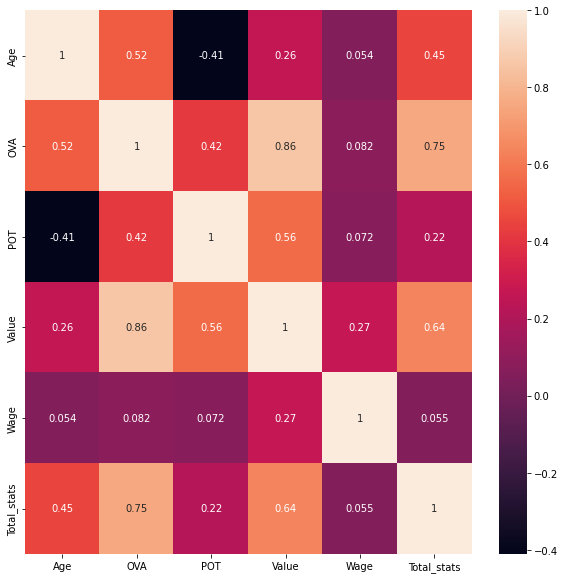

In [ ]:
plt.figure(figsize= (10,10))
sns.heatmap(fifa_600.corr(),annot = True);

In [ ]:
fifa_600.corr()

,Age,OVA,POT,Value,Wage,Total_stats
Age,1.000000,0.515359,-0.410935,0.261943,0.054367,0.451829
OVA,0.515359,1.000000,0.416764,0.857947,0.082212,0.752130
POT,-0.410935,0.416764,1.000000,0.560402,0.071927,0.218626
Value,0.261943,0.857947,0.560402,1.000000,0.271896,0.640881
Wage,0.054367,0.082212,0.071927,0.271896,1.000000,0.054755
Total_stats,0.451829,0.752130,0.218626,0.640881,0.054755,1.000000


# Below Codes are the Original code before putting them in the functions.

In [ ]:
arr = []

for i in soup.findAll('tr'):
  arr.append (i)

In [ ]:
arr[1]

- Image_link

In [ ]:
arr[1].find('img')

In [ ]:
arr[1].find('img',{"class":"player-check"})

In [ ]:
re.sub('<img.*data-srcset="| .*/>','', str(i.find('img',{"class":"player-check"})))

- Name

In [ ]:
arr[1].find('a')

In [ ]:
arr[1].find(['a','aria-label'])

In [ ]:
re.sub('<a.*ellipsis">|</div>.*/a>','',str(arr[1].find(['a','aria-label'])))

- Age

In [ ]:
arr[1].find('td',{'class':"col col-ae"})

In [ ]:
re.sub('<td.*">|</td>','',str (arr[1].find('td',{'class':"col col-ae"})))

- OVA

In [ ]:
arr[1].find('td',{'class':"col col-oa"})

In [ ]:
re.sub('<td.*">|</.*td>','',str (arr[1].find('td',{'class':"col col-oa"})))

- POT

In [ ]:
arr[1].find('td', {'class':"col col-pt"})

In [ ]:
re.sub('<td.*">|<.*>','',str (arr[1].find('td', {'class':"col col-pt"})))

- Team

In [ ]:
arr[1].findAll('a')[-1]

In [ ]:
re.sub('<a.*">|<.*>','',str (arr[1].findAll('a')[-1]))

- Duration

In [ ]:
arr[1].find("div",{'class':'sub'})

In [ ]:
re.sub('<.*\n|<.*>','',str (arr[1].find("div",{'class':'sub'})))

- value

In [ ]:
arr[1].find('td',{"class":"col col-vl"})

In [ ]:
re.sub('<td.*">|€|M|K|<.*>','',str (arr[1].find('td',{"class":"col col-vl"})))

- wage

In [ ]:
arr[1].find("td", {"class":"col col-wg"})

In [ ]:
re.sub('<td.*">|€|K|<.*>','',str (arr[1].find("td", {"class":"col col-wg"})))

- Total_stats

In [ ]:
arr[1].find("span", {"class":"bp3-tag p"})

In [ ]:
re.sub('<span.*">|<.*>','',str (arr[1].find("span", {"class":"bp3-tag p"})))

- Hits

In [ ]:
arr = []

for i in soup.findAll('td'):
  arr.append (str(i))

In [ ]:
arr[0]

In [ ]:
"""For zero arry it start with ^<td>  and ends with ">.
For first array it also start with the ^<td> ends with "> but after printing the 
Second array we are also getting (</a></td>) this output so to remove that we have 
to use it in the below function and similarly fir 3rd array also we add \n """

In [ ]:
re.sub('^<td>.*">|<td>|</td>|<.*>|\n',"",arr[9])